In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df_price = pd.read_csv('data/AAPL.csv')
df_news = pd.read_csv('data/news_total.csv').iloc[:,1:]

In [91]:
df_price.Date = pd.to_datetime(df_price.Date)
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-20,46.587502,46.799999,46.432499,46.625000,44.558361,82514800
1,2018-06-21,46.812500,47.087502,46.235001,46.365002,44.309895,102847600
2,2018-06-22,46.529999,46.537498,46.174999,46.230000,44.180870,108801600
3,2018-06-25,45.849998,46.230000,45.182499,45.542500,43.523849,126652400
4,2018-06-26,45.747501,46.632500,45.634998,46.107498,44.063793,98276800


In [88]:
df_news['date'] = pd.to_datetime(df_news.publish_date.apply(lambda x: x[:10]))
df_news.head()


,title,text,url,publish_date,date
0,Making History With the Ethiopian Diaspora Tru...,Originally published at AlMariam.com WISHING A...,http://cyberethiopia.com/2013/?p=2161,2020-01-02 09:55:40,2020-01-02
1,Tourism in Spain: Spaniards’ new travel trends...,Spaniards traveled less in the summer of 2019 ...,https://english.elpais.com/elpais/2019/12/30/i...,2020-01-02 10:31:00,2020-01-02
2,New draft GB 7718 – main changes – The CHINA F...,2019 ended with a “roar” from the food regulat...,https://chinafoodlaw.blog/2020/01/03/new-draft...,2020-01-03 05:28:40,2020-01-03
3,"Amelga, LLC announces letter released by Ermya...",FOR IMMEDIATE RELEASE Contact AmelgaLLC@gmail....,http://cyberethiopia.com/2013/?p=2165,2020-01-05 16:41:22,2020-01-05
4,Spanish airports: Airport authority plans €1.5...,The Spanish airport authority Aena is planning...,https://english.elpais.com/elpais/2020/01/03/i...,2020-01-07 07:54:47,2020-01-07


In [100]:
df_price_one_year = df_price[(df_price.Date >= '2020-01-01') & (df_price.Date <= '2020-12-31')].copy().reset_index(drop=True)
df_price_one_year.rename(columns={'Date':'date'}, inplace=True)
df_price_one_year.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347946,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634865,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869278,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041489,132079200


In [103]:
df_one_year_points = df_price_one_year.merge(df_news, on='date', how='left').copy()
df_one_year_points.head()

,date,Open,High,Low,Close,Adj Close,Volume,title,text,url,publish_date
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347946,135480400,Making History With the Ethiopian Diaspora Tru...,Originally published at AlMariam.com WISHING A...,http://cyberethiopia.com/2013/?p=2161,2020-01-02 09:55:40
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347946,135480400,Tourism in Spain: Spaniards’ new travel trends...,Spaniards traveled less in the summer of 2019 ...,https://english.elpais.com/elpais/2019/12/30/i...,2020-01-02 10:31:00
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634865,146322800,New draft GB 7718 – main changes – The CHINA F...,2019 ended with a “roar” from the food regulat...,https://chinafoodlaw.blog/2020/01/03/new-draft...,2020-01-03 05:28:40
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213615,118387200,NaN,NaN,NaN,NaN
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869278,108872000,Spanish airports: Airport authority plans €1.5...,The Spanish airport authority Aena is planning...,https://english.elpais.com/elpais/2020/01/03/i...,2020-01-07 07:54:47


In [102]:
df_news_points = df_news.merge(df_price_one_year, on='date', how='left').copy()
df_news_points.head()

,title,text,url,publish_date,date,Open,High,Low,Close,Adj Close,Volume
0,Making History With the Ethiopian Diaspora Tru...,Originally published at AlMariam.com WISHING A...,http://cyberethiopia.com/2013/?p=2161,2020-01-02 09:55:40,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347946,135480400.0
1,Tourism in Spain: Spaniards’ new travel trends...,Spaniards traveled less in the summer of 2019 ...,https://english.elpais.com/elpais/2019/12/30/i...,2020-01-02 10:31:00,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347946,135480400.0
2,New draft GB 7718 – main changes – The CHINA F...,2019 ended with a “roar” from the food regulat...,https://chinafoodlaw.blog/2020/01/03/new-draft...,2020-01-03 05:28:40,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634865,146322800.0
3,"Amelga, LLC announces letter released by Ermya...",FOR IMMEDIATE RELEASE Contact AmelgaLLC@gmail....,http://cyberethiopia.com/2013/?p=2165,2020-01-05 16:41:22,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
4,Spanish airports: Airport authority plans €1.5...,The Spanish airport authority Aena is planning...,https://english.elpais.com/elpais/2020/01/03/i...,2020-01-07 07:54:47,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869278,108872000.0


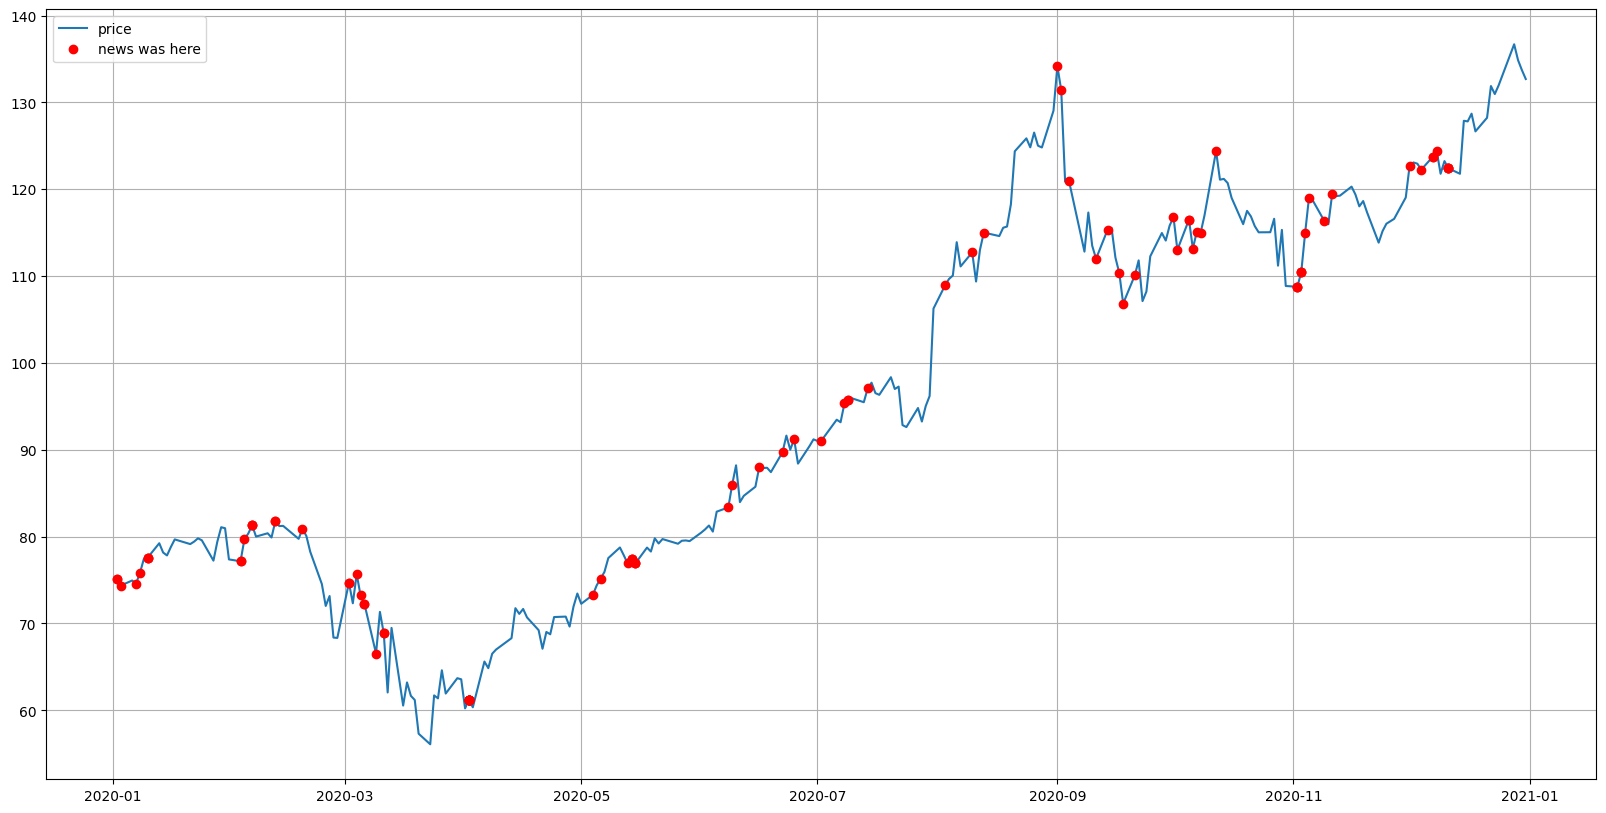

: 

In [121]:
plt.figure(figsize=(20,10))
plt.plot(df_price_one_year.date, df_price_one_year.Close, label='price')
plt.plot(df_news_points.date, df_news_points.Close, color='red', marker='o', linewidth=0, label='news was here')
plt.legend()
plt.grid()
plt.show()
#Fasttext слова в вектор, ембединг предложения это 
#взять баесовскую классификатор на два класса вверх или вниз, в качестве фичей если слово в предложении или нет
#Мешок слов 